In [5]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 한글 폰트
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

# 그래프 마이너스 폰트 깨지는 문제 대처
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

import mglearn

# 비지도 학습
- 레이블 없이, 입력 데이터만으로 데이터에서 지식을 추출해내는 것
- 데이터를 더 잘 이해하고 싶을 때 '탐색적 분석' 단계에서 많이 사용
- 지도 학습의 전처리 단계에서도 사용

단점
- 무엇이 올바른 출력인지 모르니(라벨 X), 알고리즘이 뭔가 유용한 것을 학습했는가에 대한 평가가 어려움
- 따라서, 결과를 평가하기 위해서는 직접 확인하는 것이 유일한 방법

1. 비지도 변환 (차원 축소)
    - 데이터를 새롭게 표현해, 원래 데이터보다 쉽게 해석할 수 있도록 만드는 알고리즘
    - 특성이 많은 고차원 데이터를 특성의 수를 줄여, 꼭 필요한 특징을 포함한 데이터로 표현 (차원축소)
        - ex. 시각화를 위해 데이터셋을 2차원으로 변경
    - 데이터를 구성하는 단위나 성분 찾기도함
        - ex. 많은 텍스트 문서에서 주제 추출
2. 군집
    - 데이터를 비슷한 것끼리 그룹으로 묶는 것

# 데이터 전처리와 스케일 조정

데이터 스케일 조정 방법 4가지    
* (1~3) **각 열(특성)의 통계치 이용**
1. StandardScaler
    - 각 특성의 평균을 0, 분산을 1로 변경하여, 모든 특성이 같은 크기를 가지게 함
2. RobustScaler
    - 특성들이 같은 스케일을 갖게됨 (StandardScaler와 비슷)
    - 중간값과 사분위값을 사용 (평균, 분산 대신)
        - 이 방식때문에 **이상치에 영향을 받지 않음**
3. MinMaxScaler
    - 모든 특성이 정확하게 0 ~ 1 사이에 위치하도록 데이터를 변경    

4. Normalizer - **행(데이터 포인트)마다 각각 정규화**
    - 특성 벡터의 유클리디안 길이가 1이 되도록 데이터 포인트를 조정 (지름이 1인 원(3차원-구)에 데이터 포인트를 투영함
        - norm 매개변수는 l1, l2(유클리디안 거리), max 3가지 옵션 제공
    - 각 데이터 포인트(행)가 다른 비율로(길이에 반비례하여) 스케일이 조정됨
    - 특성 벡터의 길이는 상관 X, **데이터의 방향(or 각도)만 중요할 때 많이 사용**

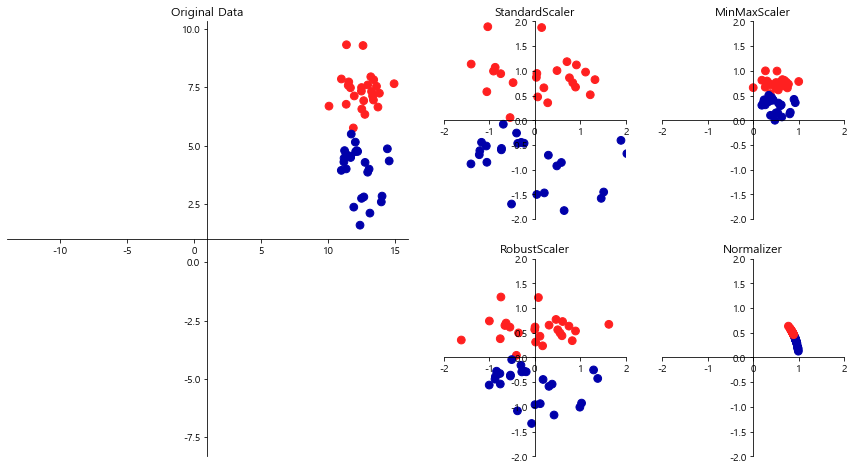

In [3]:
mglearn.plots.plot_scaling()

## 스케일 조정 실습
- 스케일을 조정하는 전처리 메서드들은 보통 지도 학습 알고리즘을 적용하기 전에 적용
- 스케일 객체는 fit 메서드를 호출할 때, 훈련데이터(X_train)만 넘겨주며, y_train은 사용 X

In [7]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)

print(X_train.shape)
print(y_train.shape)

(426, 30)
(426,)


In [10]:
# minmaxscaler
from sklearn.preprocessing import MinMaxScaler

# 스케일 객체 생성
scaler = MinMaxScaler()

# fit - 훈련 데이터(X_train)만!
scaler.fit(X_train)

# transfrom - 데이터에 학습한 변환 적용
X_train_scaled = scaler.transform(X_train)     # fit_transform 해도 됨

In [11]:
# 스케일 조정된 후, 데이터셋의 속성 확인
print('변환된 후 크기:', X_train_scaled.shape)
print('스케일 조정 전 특성별 최소값:\n', X_train.min(axis=0))
print('스케일 조정 전 특성별 최대값:\n', X_train.max(axis=0))
print('-'*50)
print('스케일 조정 후 특성별 최소값:\n', X_train_scaled.min(axis=0))
print('스케일 조정 후 특성별 최댓값:\n', X_train_scaled.max(axis=0))

변환된 후 크기: (426, 30)
스케일 조정 전 특성별 최소값:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
스케일 조정 전 특성별 최대값:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
--------------------------------------------------
스케일 조정 후 특성별 최소값:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
스케일 조정 후 특성별 최댓값:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


- 변환된 데이터의 배열 크기는 원래 데이터와 동일
- 모든 특성의 값이 0 ~ 1 사이에 있게 변환됨

In [12]:
# test set에도 변환 적용
X_test_scaled = scaler.transform(X_test)

In [13]:
print('스케일 조정 후 특성별 최소값:\n', X_test_scaled.min(axis=0))
print('스케일 조정 후 특성별 최댓값:\n', X_test_scaled.max(axis=0))

스케일 조정 후 특성별 최소값:
 [ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
스케일 조정 후 특성별 최댓값:
 [0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


- train set 변환 때와는 다르게 최소값/최대값이 0, 1이 아니며, 일부 특성은 0 ~ 1범위를 벗어남
- 같은 변환을 적용해야하기 때문에! transform 메서드는 훈련 세트의 최솟값으로 빼고 훈련 세트 범위로 나눔 
    - 테스트 세트의 최솟값과 범위를 사용하지 않음!

## QuantileTransformer, PowerTransformer
1. QuantileTransformer - scikit-learn 0.19.0 ver. 부터 추가됨
    - 기본적으로 1,000개의 분위(quantile)를 사용하여 데이터를 균등하게 분포시킴
        - 분위 수는 n_quantiles 매개변수에서 설정 가능 (기본값 1,000)
        - scaler 객체의 quantiles_ 속성네는 특성별로 계산된 분위값 들어있음 - 크기: (n_quantiles, n_features)
    - 이상치에 민감하지 않으며, 전체 데이터를 0 ~ 1 사이로 압축함
        - RobustScaler + MinMaxScaler 느낌?
2. PowerTransformer - scikit-learn 0.20.0 ver. 부터 추가됨
    - 데이터 특성별로 정규분포 형태에 가깝도록 변환해줌
    - method 매개변수에 'yeo-johnson'(기본값),'box-cox' 알고리즘 지정 가능

In [14]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import QuantileTransformer, StandardScaler, PowerTransformer

### QuantileTransformer

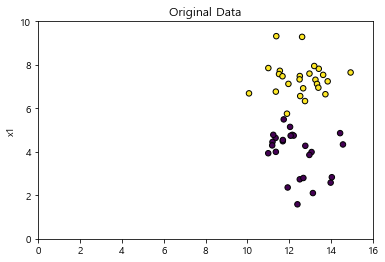

In [15]:
# 이 전 4개 스케일러 설명시 사용했던 예제 데이터와 동일
X, y = make_blobs(n_samples=50, centers=2, random_state=4, cluster_std=1)
X += 3

plt.scatter(X[:, 0], X[:,1], c=y, s=30, edgecolors='black')
plt.xlim(0,16)
plt.ylabel('x0')
plt.ylim(0,10)
plt.ylabel('x1')
plt.title('Original Data')
plt.show()

C:\Users\qkrwl\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (50). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


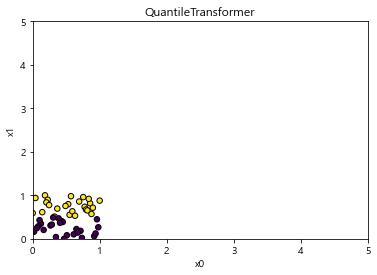

In [18]:
# 위 데이터에 QuantileTransformer 적용
scaler = QuantileTransformer()        # 분위수 n_quantiles 매개변수에서 설정 가능 (기본값 1,000)
X_trans = scaler.fit_transform(X)

plt.scatter(X_trans[:, 0], X_trans[:,1],c=y, s=30, edgecolor='black')
plt.xlim(0,5)
plt.xlabel('x0')
plt.ylim(0,5)
plt.ylabel('x1')
plt.title(type(scaler).__name__)
plt.show()

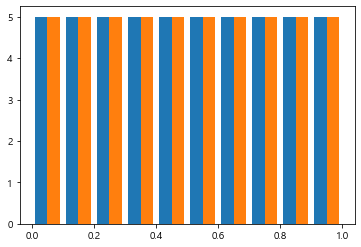

In [19]:
# 변환된 데이터 - 히스토그램 시각화 -  균등 분포 쉽게 확인 가능
plt.hist(X_trans)
plt.show()

In [20]:
# scaler객체의 quantiles_ 속성에 특성별 계산된 분위 값이 들어 있음 - 크기: (n_quantiles, n_features)
scaler.quantiles_.shape

(50, 2)

In [21]:
scaler.quantiles_

array([[10.07391193,  1.58657135],
       [10.99313649,  2.10376912],
       [10.99815287,  2.36006775],
       [11.18378052,  2.58367939],
       [11.19679821,  2.73569682],
       [11.23501274,  2.79716835],
       [11.34468785,  2.83183283],
       [11.35656532,  3.85665806],
       [11.35760513,  3.93528488],
       [11.37839711,  3.99078055],
       [11.5093186 ,  3.99907772],
       [11.54824906,  4.27689813],
       [11.67494727,  4.29564214],
       [11.68937095,  4.3389402 ],
       [11.69289001,  4.45456477],
       [11.7337095 ,  4.48709629],
       [11.8888119 ,  4.54322016],
       [11.92229526,  4.63824349],
       [11.95786868,  4.74115688],
       [12.03763281,  4.7467316 ],
       [12.06439343,  4.78117369],
       [12.1438515 ,  4.78248134],
       [12.20989214,  4.85948594],
       [12.38860303,  5.14664757],
       [12.49123469,  5.49162431],
       [12.50048972,  5.75339082],
       [12.50229021,  6.33454307],
       [12.5211582 ,  6.56405517],
       [12.61215674,

#### scaler.quantiles_ 반환 분위수 더 자세히

In [24]:
# np.percentile(): 두 번째 매개변수에서 지정한 분위에 해당하는 샘플을 추출하여 반환
x = np.array([[0],[5],[8],[9],[10]])   # 임의 data set
np.percentile(x[:, 0], [0, 25, 50, 75, 100])    # 첫 번째, 1사분위, 중간값, 3사분위, 마지막 값

array([ 0.,  5.,  8.,  9., 10.])

In [25]:
# QuantileTransformer로 변환 후 확인 해보기
x_trans = QuantileTransformer().fit_transform(x)
np.percentile(x_trans[:, 0], [0, 25, 50, 75, 100])

C:\Users\qkrwl\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (5). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


array([0.  , 0.25, 0.5 , 0.75, 1.  ])

- 분위화 동일한 값으로 변환됨

#### 균등 분포가 아닌, 정규분포로 출력 바꿔보기
- output_distribution 매개변수에서 normal로 지정하면, 정규분포로 출력 변경 가능

C:\Users\qkrwl\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (50). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


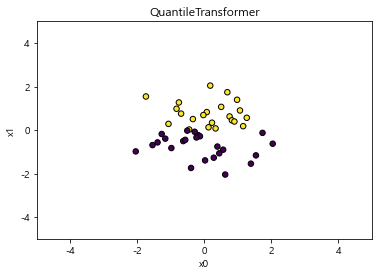

In [26]:
# 정규 분포로 출력 바꾼 경우
scaler = QuantileTransformer(output_distribution='normal')
X_trans = scaler.fit_transform(X)

plt.scatter(X_trans[:, 0], X_trans[:,1], c=y, s=30, edgecolor='black')
plt.xlim(-5,5)
plt.xlabel('x0')
plt.ylim(-5,5)
plt.ylabel('x1')
plt.title(type(scaler).__name__)
plt.show()

- 아까와 같은 0 ~ 1 사이에 있지 않음. 정규분포 출력으로 바뀜

## QuantileTransformer, StandardScaler, PowerTransformer의 두 알고리즘
- 예제 데이터셋을 정규분포로 변환하는 차이 확인(비교)

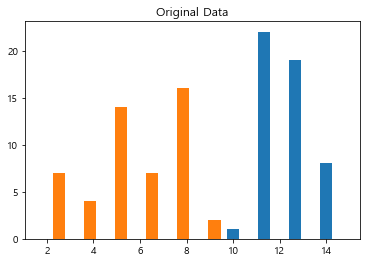

C:\Users\qkrwl\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (50). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


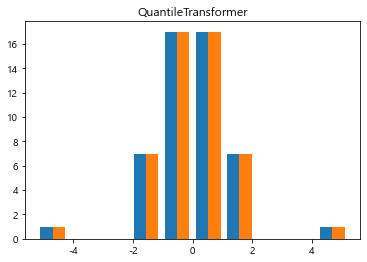

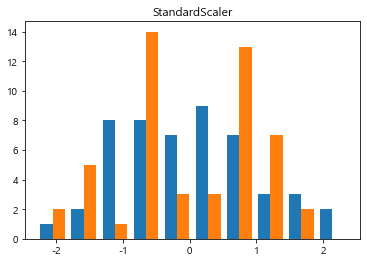

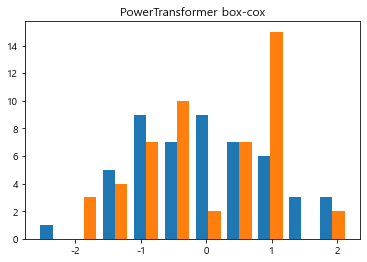

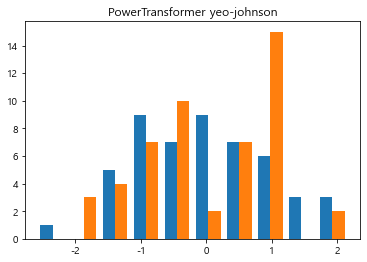

In [28]:
plt.hist(X)
plt.title('Original Data')
plt.show()

# 정규분포 변환
X_trans = QuantileTransformer(output_distribution='normal').fit_transform(X)
plt.hist(X_trans)
plt.title('QuantileTransformer')
plt.show()

X_trans = StandardScaler().fit_transform(X)
plt.hist(X_trans)
plt.title('StandardScaler')
plt.show()

X_trans = PowerTransformer(method='box-cox').fit_transform(X)
plt.hist(X_trans)
plt.title('PowerTransformer box-cox')
plt.show()

X_trans = PowerTransformer(method='yeo-johnson').fit_transform(X)
plt.hist(X_trans)
plt.title('PowerTransformer yeo-johnson')
plt.show()

- 이 예에서는 PowerTransformer의 두 알고리즘이 동일한 결과를 만듬
- 실전에서는 데이터셋마다 어떤 변환이 정규분포에 가깝게 변환할지 사전에 알기 어려움
- 따라서, 각 변환기의 결과를 히스토그램으로 확인해보는 것이 좋음

# 훈련 데이터와 테스트 데이터의 스케일을 같은 방법으로 조정하기
- 지도 학습 모델에서 테스트 세트를 사용하려면, 훈련 세트와 테스트 세트에 같은 변환을 적용해야함!

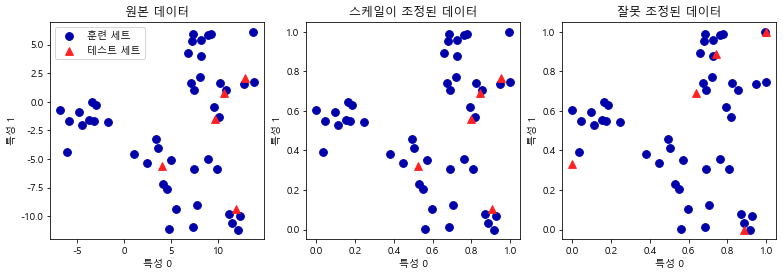

In [32]:
# 잘못된 예시 - 훈련 세트의 최솟값과 범위를 사용하지 않고, 테스트 세트의 최솟값과 범위를 사용하면 어떻게 되나
from sklearn.datasets import make_blobs
# 인위적인 데이터셋 생성
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
# 훈련 세트와 테스트 세트로 나누기
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

# 훈련 세트와 테스트 세트의 산점도 그리기
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:,0], X_train[:, 1], c=mglearn.cm2.colors[0], label='훈련 세트', s=60)
axes[0].scatter(X_test[:,0], X_test[:, 1], marker='^', c=mglearn.cm2.colors[1], label='테스트 세트', s=60)
axes[0].legend(loc='upper left')
axes[0].set_title('원본 데이터')

# MinMaxScaler를 사용해 스케일 조정
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 스케일이 조정된 데이터의 산점도 그리기
axes[1].scatter(X_train_scaled[:,0], X_train_scaled[:, 1], c=mglearn.cm2.colors[0], label='훈련 세트', s=60)
axes[1].scatter(X_test_scaled[:,0], X_test_scaled[:, 1], marker='^', c=mglearn.cm2.colors[1], label='테스트 세트', s=60)
axes[1].set_title('스케일이 조정된 데이터')

# 테스트 세트의 스케일을 따로 조정 - 잘못된 예시!!
# 테스트 세트의 최솟값은 0, 최댓값은 1이 됨
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# 잘못 조정된 데이터의 산점도 그리기
axes[2].scatter(X_train_scaled[:,0], X_train_scaled[:, 1], c=mglearn.cm2.colors[0], label='훈련 세트', s=60)
axes[2].scatter(X_test_scaled_badly[:,0], X_test_scaled_badly[:, 1], marker='^', c=mglearn.cm2.colors[1], label='테스트 세트', s=60)
axes[2].set_title('잘못 조정된 데이터')

for ax in axes:
    ax.set_xlabel('특성 0')
    ax.set_ylabel('특성 1')

- 스케일이 조정된 데이터는 원본 데이터와 비교했을 때 x,y축의 눈금이 변경된 것만 빼면 원본 데이터 그래프와 동일
    - 모든 특성이 0 ~ 1 사이에 놓여있음 (하지만, 테스트 데이터의 최솟값/최댓값은 0,1이 아님)
- 스케일이 잘못 조정된 데이터는 훈련 세트와 테스트 세트의 최솟값/최댓값이 모두 0,1임
    - 테스트 포인트는 스케일이 다르게 조정되었기 때문에, 훈련 세트와 다른 비율로 이동했음 => 데이터 배열이 원본과 비교했을 때 뒤죽박죽

# 지도 학습(SVM)에서 데이터 전처리(스케일링) 효과

In [35]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svm = SVC(C=100)
svm.fit(X_train, y_train)
'테스트 세트 정확도: {:.2f}'.format(svm.score(X_test, y_test))

'테스트 세트 정확도: 0.94'

- 책 집필 시기의 svm 정확도 0.63 나옴

In [36]:
# 학습 전 데이터 스케일 조정
# 0 ~ 1 사이로 스케일 조정
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 조정된 데이터로 학습
svm.fit(X_train_scaled, y_train)

# 스케일이 조정된 테스트 세트의 정확도
'스케일 조정된 테스트 세트의 정확도: {:.2f}'.format(svm.score(X_test_scaled, y_test))

'스케일 조정된 테스트 세트의 정확도: 0.97'

- 정확도 조금 더 높아짐

In [38]:
# 평균 0, 분산 1을 갖도록 스케일 조정
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 조정된 데이터로 SVM 학습
svm.fit(X_train_scaled, y_train)

# 스케일이 조정된 테스트 세트의  정확도
'SVM test accracy: {:.2f}'.format(svm.score(X_test_scaled, y_test))

'SVM test accracy: 0.96'